# **Car Selling Price Prediction using Random Forest Regression** 

## Importing the initial libraries.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# to not get the warning messages
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [3]:
# reading the dataset
dataset = pd.read_csv('../data/Car_details.csv')
dataset.head()   # Displays first 5 rows of our dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
dataset.shape

(8128, 13)

## Data Cleaning

This function is going to remove all the characters other than numbers from the columns('mileage', 'engine', 'max_power') of the dataset.

In [5]:
def string_to_float(column):
    for i in range(len(dataset[(column)])):
        if type(dataset[(column)][i]) == str:
            splitted_list = dataset[(column)][i].split()
            if splitted_list[0] == 'bhp':
                dataset[(column)][i] = 0
            else:
                dataset[(column)][i] = float(dataset[(column)][i].split()[0])  
                
b = ['mileage','engine','max_power']
for i in b:
    string_to_float(i)  

dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
dataset = dataset.drop(['name','torque'],axis = 1) #Drop Respective columns from the dataset
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [7]:
current_year = 2022
dataset['Years_Old'] = current_year - dataset['year'] 
dataset = dataset.drop('year', axis = 1)
dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Years_Old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,15


Adding a column to indicate how many years it has been since the car was purchased. 

## Dealing with Missing Values

<AxesSubplot:>

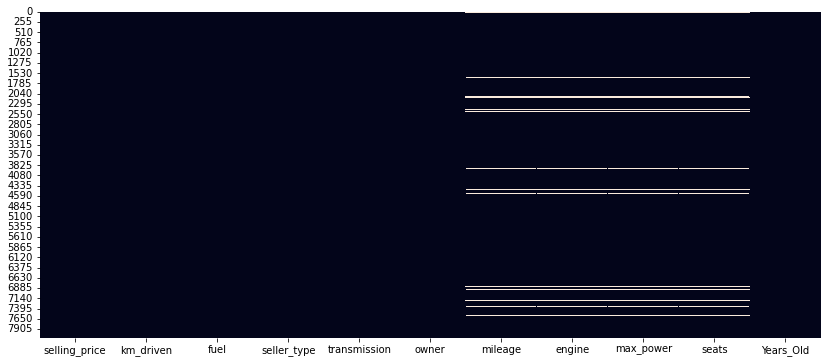

In [8]:
import seaborn as sns
plt.figure(figsize = (14,6))
sns.heatmap(dataset.isnull(), cbar=False)

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset.iloc[:,6:])
dataset.iloc[:,6:] = imputer.transform(dataset.iloc[:,6:]) 

We'll be replacing those missing values with the mean of all the values in that specific column.

<AxesSubplot:>

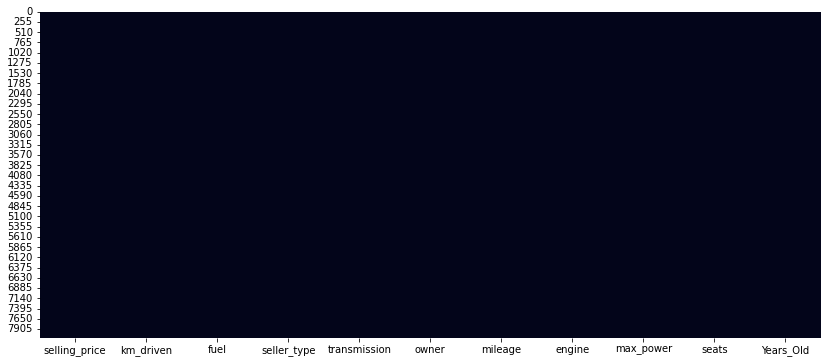

In [10]:
plt.figure(figsize = (14,6))
sns.heatmap(dataset.isnull(), cbar=False)

## Analyzing Data for Patterns

In [11]:
corr_matrix = dataset.corr() #used to find correlation between numerical features
corr_matrix["selling_price"].sort_values(ascending=False)

selling_price    1.000000
max_power        0.744876
engine           0.453567
seats            0.041161
mileage         -0.125454
km_driven       -0.225534
Years_Old       -0.414092
Name: selling_price, dtype: float64

<AxesSubplot:title={'center':'Co-relation between all the numerical features of the dataset'}>

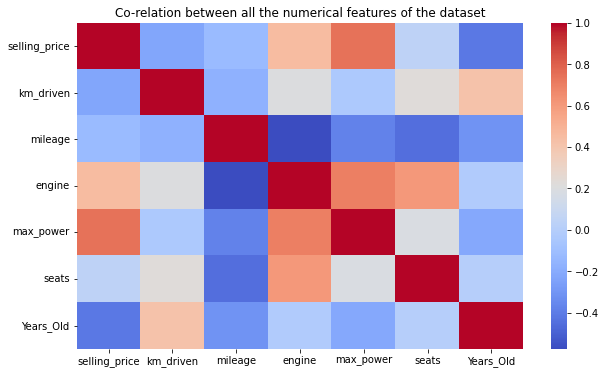

In [12]:
plt.figure(figsize=(10,6))
plt.title('Co-relation between all the numerical features of the dataset')
sns.heatmap(data = corr_matrix, cmap="coolwarm")

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

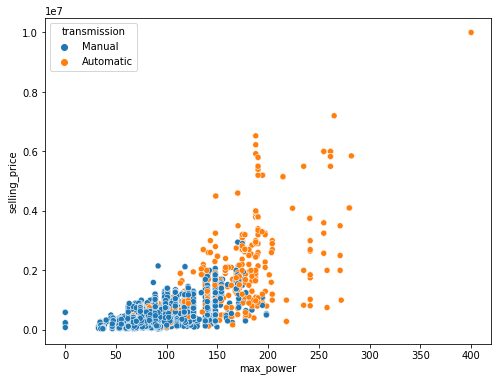

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'max_power', y = 'selling_price', data = dataset, hue = 'transmission' )

We can observe that Automatic cars tend to have more power than their Manual counterparts and due to the strong correlation between power and price, they are also quite expensive

<AxesSubplot:title={'center':'Relation between kilometers driven and Selling price of the car'}, xlabel='km_driven', ylabel='selling_price'>

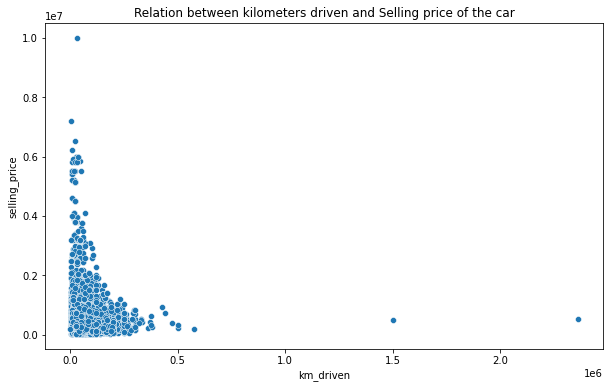

In [14]:
plt.figure(figsize= (10,6))
plt.title('Relation between kilometers driven and Selling price of the car')
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = dataset)

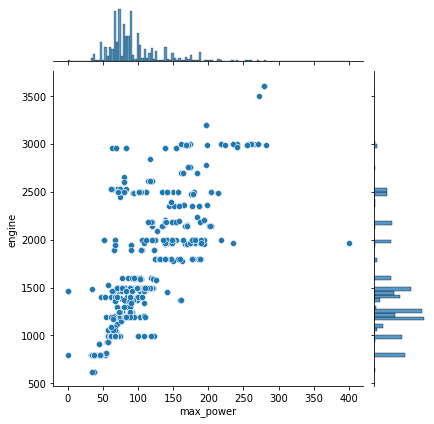

In [15]:
sns.jointplot(x = 'max_power', y = 'engine', data = dataset)

Here we can see that the power is directly proportional to the Engine Displacement.

<AxesSubplot:title={'center':'Relation between mileage and Engine Displacement'}, xlabel='mileage', ylabel='engine'>

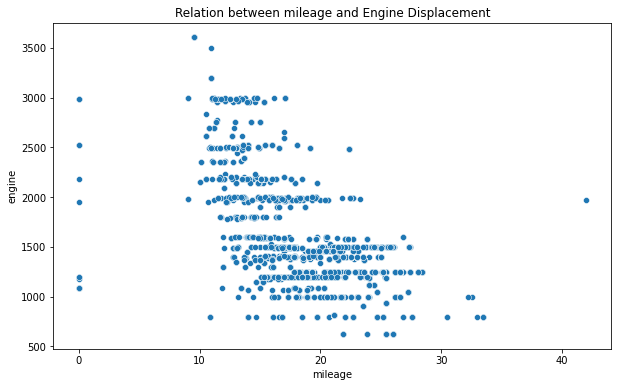

In [16]:
plt.figure(figsize = (10,6))
plt.title('Relation between mileage and Engine Displacement')
sns.scatterplot(x = 'mileage', y = 'engine', data = dataset)

The Mileage decreases with increase in Engine Displacement.

## Segregating the Dataset into Features and Label 

In [17]:
X = dataset.drop('selling_price', axis = 1) #Independent Features
Y = np.array(dataset['selling_price']) #Dependent Feature

In [18]:
X.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Years_Old
0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8.0
1,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8.0
2,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16.0
3,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12.0
4,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15.0


In [19]:
Y

array([450000, 370000, 158000, ..., 382000, 290000, 290000])

## One-Hot Encoding the Categorical Features 

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4])], remainder='passthrough')
X = (ct.fit_transform(X))

In [21]:
X = np.array(X)
X[0]

array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.455e+05, 2.340e+01, 1.248e+03, 7.400e+01,
       5.000e+00, 8.000e+00])

## Splitting the Dataset into Training Data and Test Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## Building and Training the Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 220, random_state = 0)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=220, random_state=0)

## Making Predictions


In [24]:
preds = model.predict(X_test)

In [25]:
preds 

array([ 214067.72727273, 1304331.81818182,  912647.72727273, ...,
        188404.46363636,  666598.86363636,  777840.15151515])

## Testing the Performance of our Model

In [26]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(Y_test, preds)
print('MAE:', score)

MAE: 64157.42452144545


In [27]:
from sklearn.metrics import r2_score
r2_score(Y_test, preds)

0.9706477902753863

R2_score corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The higher the R-squared, the better the model.

<AxesSubplot:title={'center':'Comparison between Actual and Predicted Values'}, xlabel='Actual Values', ylabel='Predicted Values'>

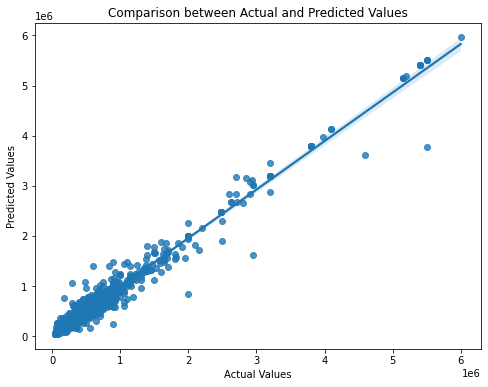

In [28]:
plt.figure(figsize = (8,6))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison between Actual and Predicted Values')
sns.regplot(x = Y_test, y = preds)

## Saving the model

In [29]:
import pickle
pickle.dump(model, open("../models/model.pkl", "wb"))